In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
raw=pd.read_csv("D:\L-3 T-2\python-control-system\python-control-system\dataset/exp9-group-1-2.csv")
raw.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output
0,241.79,0.001526,0.0,0.0,0.005757,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
1,241.80,0.001526,0.0,0.0,-0.014394,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
2,241.81,0.001526,0.0,0.0,-0.060453,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
3,241.82,0.001526,0.0,0.0,0.005757,0.0,0.001526,0.001526,0.001526,0.001526,0.001526
4,241.83,0.001526,0.0,0.0,0.008636,0.0,0.001526,0.001526,0.001526,0.001526,0.001526


In [3]:
raw.shape

(45390, 11)

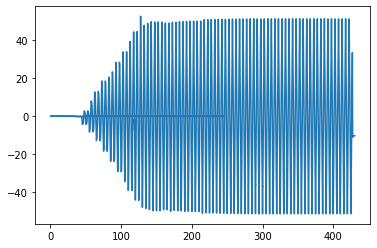

In [4]:
#%matplotlib widget
plt.plot(raw.TimeStamp, raw.Position)

In [5]:
raw.columns

Index(['TimeStamp', 'Reference', 'Position', 'Speed', 'Current', 'Voltage',
       'Error', 'Kp x Error', 'Error Sum / Ti', 'Td x Delta PV', 'PID Output'],
      dtype='object')

In [6]:
remove_noise=raw.loc[4006:, :]
remove_noise["gain"]=np.around(remove_noise["Kp x Error"]/remove_noise["Error"], 1)

<ipython-input-6-d8819524f7ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_noise["gain"]=np.around(remove_noise["Kp x Error"]/remove_noise["Error"], 1)


In [7]:
remove_noise.head()

,TimeStamp,Reference,Position,Speed,Current,Voltage,Error,Kp x Error,Error Sum / Ti,Td x Delta PV,PID Output,gain
4006,34.75,-3.956664,0.00,0.000000,-0.083483,-7.034627,-3.956664,-7.914855,0.001526,0.001526,-7.914855,2.0
4007,34.76,-3.996338,0.00,0.000000,-2.760705,-7.126316,-3.996338,-7.994202,0.001526,0.001526,-7.994202,2.0
4008,34.77,-4.036011,-0.02,-0.347222,-2.783735,-7.130991,-4.017700,-8.036927,0.001526,0.001526,-8.036927,2.0
4009,34.78,-4.075685,-0.02,0.000000,-2.760705,-7.220248,-4.057374,-8.116274,0.001526,0.001526,-8.116274,2.0
4010,34.79,-4.115358,-0.02,0.000000,-2.806765,-7.265997,-4.097047,-8.195621,0.001526,0.001526,-8.195621,2.0


In [8]:
remove_noise.gain.nunique()

53

In [9]:
remove_noise.gain.unique()

array([ 2. ,  2.1,  1.9,  1. ,  3. ,  4. ,  4.1,  6. ,  6.1,  8. ,  8.1,
        8.2, 10. , 10.1,  9.9, 12. , 12.1, 11.9, 14. , 13.9, 13.5, 14.2,
       14.1, 14.3, 13.8, 13. , 14.5, 13.1, 13.7, 16. , 16.1, 16.2, 15.9,
       15.7, 15.8, 16.3, 15.6, 16.6, 16.4, 15.4, 31. , 14.8, 17.2, 17. ,
       15. , 14.6, 17.4, 21. , 16.5, 15.5, 16.7, 11. , 15.3])

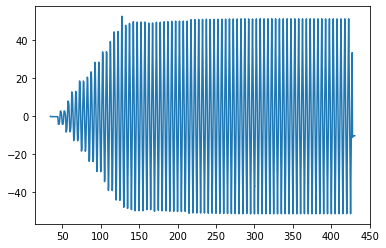

In [10]:
plt.plot(remove_noise.TimeStamp, remove_noise.Position)

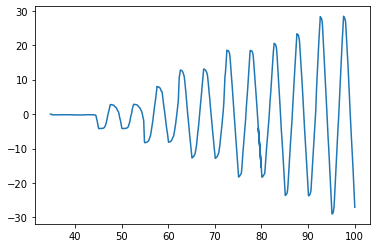

In [11]:
raw_100=remove_noise[remove_noise.TimeStamp<=100]
plt.plot(raw_100.TimeStamp, raw_100.Position)

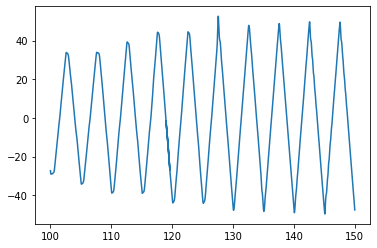

In [12]:
raw100to150=remove_noise[(remove_noise.TimeStamp>100) & (remove_noise.TimeStamp<=150)]
plt.plot(raw100to150.TimeStamp, raw100to150.Position)

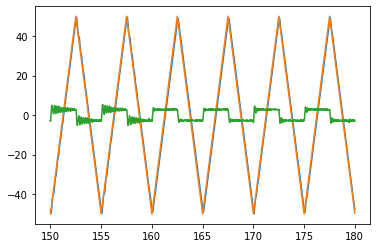

In [13]:
raw150to180=remove_noise[(remove_noise.TimeStamp>150) & (remove_noise.TimeStamp<=180)]
plt.plot(raw150to180.TimeStamp, raw150to180.Position)
plt.plot(raw150to180.TimeStamp, raw150to180.Reference)
plt.plot(raw150to180.TimeStamp, raw150to180.Speed)

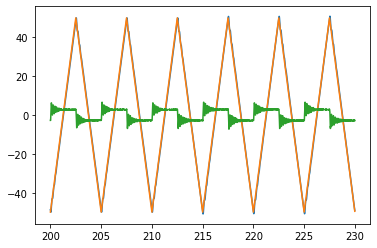

In [14]:
raw200to230=remove_noise[(remove_noise.TimeStamp>200) & (remove_noise.TimeStamp<=230)]
plt.plot(raw200to230.TimeStamp, raw200to230.Position)
plt.plot(raw200to230.TimeStamp, raw200to230.Reference)
plt.plot(raw200to230.TimeStamp, raw200to230.Speed)

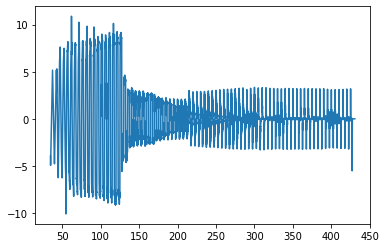

In [19]:
plt.plot(remove_noise.TimeStamp, remove_noise.Error)